In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

from google.cloud import storage

from source.patch_stitch import get_img_from_patch

In [2]:
index = pd.read_csv("gs://fdl-mag-2-ml/MDI_HMI_1_patch_all128_128_u/validate/index.csv")

In [26]:
mdi_path1 = index.loc[500, 'filename_source']
hmi_path1 = index.loc[500, 'filename_target']

In [27]:
client = storage.Client()
bucket = client.get_bucket('fdl-mag-2-ml')

In [28]:
blob = storage.Blob("MDI_HMI_1_patch_all128_128_u/validate/{}".format(mdi_path1), bucket)
blob.download_to_filename('tmp.npy')
ar1 = np.load('tmp.npy')

In [29]:
blob = storage.Blob("MDI_HMI_1_patch_all128_128_u/validate/{}".format(hmi_path1), bucket)
blob.download_to_filename('tmp.npy')
ar2 = np.load('tmp.npy')

In [30]:
# downsample hmi by 4
ar_down = resize(ar2[0, :, :], (32, 32), anti_aliasing=True)

In [31]:
diff_ar = ar_down - ar1[0, :, :]

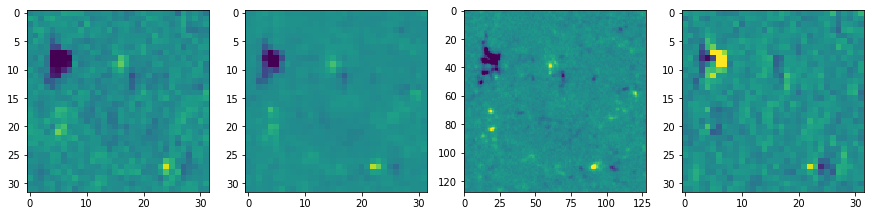

In [32]:
fi, ax = plt.subplots(ncols=4, nrows=1, figsize=(15, 15))
ax[0].imshow(ar1[0, :, :], vmin=-100, vmax=100)
ax[1].imshow(ar_down, vmin=-100, vmax=100)
ax[2].imshow(ar2[0, :, :], vmin=-100, vmax=100)
ax[3].imshow(diff_ar, vmin=-100, vmax=100)

In [5]:
# test reconstruction from patches
index = pd.read_csv("gs://fdl-mag-2-ml/MDI_HMI_1_patch_all128_128_u/train/index.csv")

In [66]:
path_list = list(index[index.dateobs == '2010-04-07 01:39:01.278'].filename_target)

In [67]:
array_list = []
client = storage.Client()
bucket = client.get_bucket('fdl-mag-2-ml')
for file in path_list:
    blob = storage.Blob("MDI_HMI_1_patch_all128_128_u/train/{}".format(file), bucket)
    blob.download_to_filename('tmp.npy')
    ar1 = np.load('tmp.npy')
    array_list.append(ar1)

In [70]:
ar = array_list[0]

In [71]:
tensor2 = np.stack(array_list, axis=1)

In [72]:
tensor_rec2 = get_img_from_patch(tensor2[0, :, :, :])

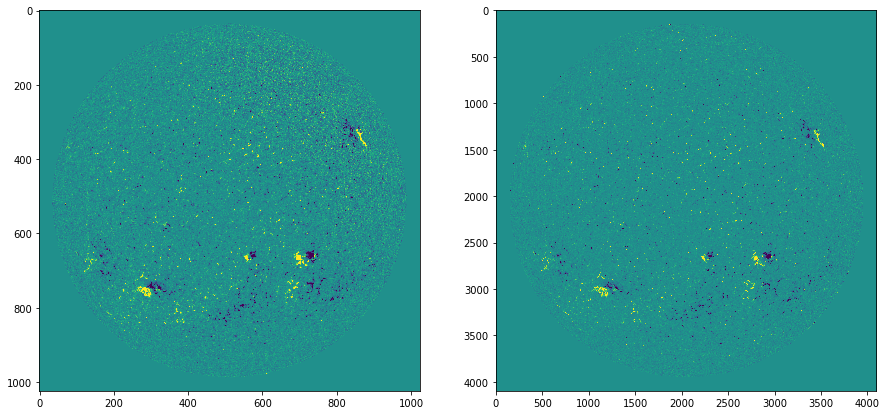

In [73]:
fi, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 15))
ax1 = ax[0]
ax2 = ax[1]
ax1.imshow(tensor_rec, vmin=-100, vmax=100)
ax2.imshow(tensor_rec2, vmin=-100, vmax=100)

In [65]:
ar2 = tensor_rec.ravel()
ar2[ar2 ==0].shape[0] / ar2.shape[0]


0.3336763381958008

In [25]:
tensor.mean()

0.3534730046526331

In [42]:
tensor_rec.mean()


-0.11710423162158264

In [44]:
 tensor[0, :, :, :].mean()

-0.1171042316215832

In [45]:
tensor.shape

(2, 1024, 128, 128)

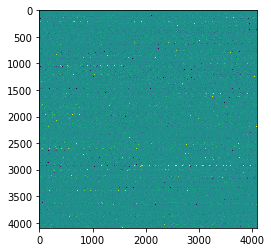

In [48]:
plt.imshow(t, vmin=-100, vmax=100)